<a href="https://colab.research.google.com/github/ribeirolucas962/exemplo/blob/master/Desafio_numero_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fazendo instalção das bibliotecas

In [ ]:
!pip install sidetable
!pip install ydata-profiling
!pip install upgrade matplotlib
!pip install xlrd -q
!pip install openpyxl -q
!pip install lifetimes -q

In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import missingno as msno
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from sklearn.preprocessing import MinMaxScaler
from lifetimes.plotting import plot_period_transactions
from sklearn import metrics
import warnings
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder, OrdinalEncoder

<ipython-input-4-df91a678658b>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


#Carregando a base de dados


In [ ]:
df = pd.read_csv('/content/data (2).csv', header= 0,
                        encoding= 'unicode_escape')


#Fazendo uma copia dos dados

In [ ]:
df = df.copy()

#Lendo as colunas dos dados.

In [ ]:
df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
5  12/1/2010 8:26       7.65     17850.0  United Kingdom  
6  12/1/2010 8:26       4.25     17850.0  United Kingdom  
7  12/1/2010 8:28       1.85     17850.0  United Kingdom  
8  12/1/2010 8:28       1.85     17850.0  United Kingdom  
9  12/1/2010 8:34       1.69     13047.0  United Kingdom

In [ ]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#Verificando o tamanho da base de dados


In [ ]:
df.shape

(541909, 8)

#verificando variaveis numericas se existe algo fora do padrão

In [ ]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

#Variaveis categoricas

In [ ]:
df.describe(include = 'O')

InvoiceNo StockCode                         Description  \
count     541909    541909                              540455   
unique     25900      4070                                4223   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq        1114      2313                                2369   

             InvoiceDate         Country  
count             541909          541909  
unique             23260              38  
top     10/31/2011 14:41  United Kingdom  
freq                1114          495478

#convertendo a coluna invoiceDate para o formato datetime
#Convertendo a coluna CustomerID para o formato object

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%m/%d/%Y %H:%M")

In [ ]:
df = df.astype({"CustomerID": object})

In [ ]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

#Verificando dados nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


#Contabilizando linhas com valores nulos

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#Fazendo remoção dos valore nulos

In [ ]:
df.dropna(inplace=True)

#Verificando com ficou depois de remover os valores nulos

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#verificando valores 0 nas colunas UnitPrice ,Quantity.

In [ ]:
df[df['Quantity']==0].head()

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

#Na coluna UnitPrice nao foi removido pode ser brinds .

In [ ]:
df[df['UnitPrice']==0].head()

InvoiceNo StockCode                   Description  Quantity  \
9302     537197     22841  ROUND CAKE TIN VINTAGE GREEN         1   
33576    539263     22580  ADVENT CALENDAR GINGHAM SACK         4   
40089    539722     22423      REGENCY CAKESTAND 3 TIER        10   
47068    540372     22090       PAPER BUNTING RETROSPOT        24   
47070    540372     22553        PLASTERS IN TIN SKULLS        24   

              InvoiceDate  UnitPrice CustomerID         Country  
9302  2010-12-05 14:02:00        0.0    12647.0         Germany  
33576 2010-12-16 14:36:00        0.0    16560.0  United Kingdom  
40089 2010-12-21 13:45:00        0.0    14911.0            EIRE  
47068 2011-01-06 16:41:00        0.0    13081.0  United Kingdom  
47070 2011-01-06 16:41:00        0.0    13081.0  United Kingdom

#Remoção de linhas duplicadas

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39    17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75    17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39    17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39    17850.0  United Kingdom  
5 2010-12-01 08:26:00       7.65    17850.0  United Kingdom  
6 2010-12-01 08:26:00       4.25    17850.0  United Kingdom  
7 2010-12-01 08:28:00       1.85    17850.0  United Kingdom  
8 2010-12-01 08:28:00       1.85    17850.0  United Kingdom  
9 2010-12-01 08:34:00       1.69    13047.0  United Kingdom

#verificando se há uma correlação especifica entre os valores faltantes

<Axes: >

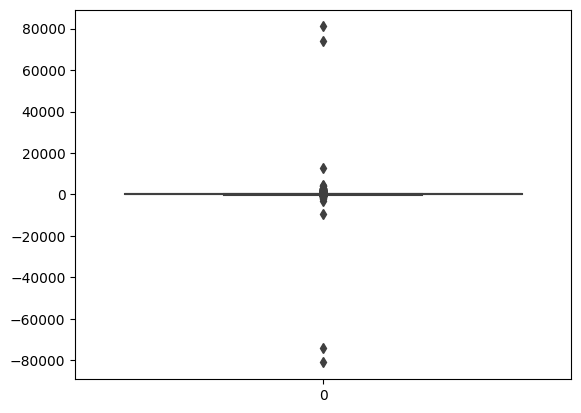

In [ ]:
sns.boxplot(df['Quantity'])

<Axes: >

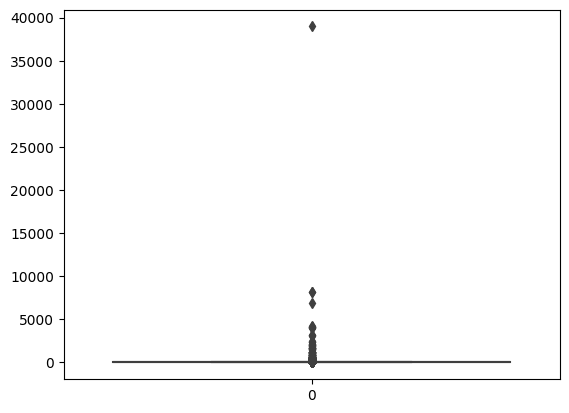

In [ ]:
sns.boxplot(df['UnitPrice'])

In [ ]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

#Fazendo replace

In [ ]:
replace_with_thresholds(df,"Quantity")
replace_with_thresholds(df,"UnitPrice")


#visualisando as variaveis depois da correção de outliers

In [ ]:
df.describe([0.01,0.25,0.50,0.75,0.99]).T

count       mean         std      min    1%   25%   50%    75%  \
Quantity   401604.0  11.019223  176.191356 -80995.0 -2.00  2.00  5.00  12.00   
UnitPrice  401604.0   2.941371    3.345005      0.0  0.21  1.25  1.95   3.75   

             99%      max  
Quantity   120.0  303.000  
UnitPrice   15.0   37.185

#Preparação de dados

In [ ]:
def crm_data_prep(dataframe):
    dataframe.dropna(axis=0, inplace=True)
    dataframe = dataframe[~dataframe["InvoiceNo"].str.contains("C", na=False)]
    dataframe = dataframe[dataframe["Quantity"] > 0]
    dataframe["TotalPrice"] = dataframe["Quantity"] * dataframe["UnitPrice"]
    return dataframe

#Verificando outliers depois de removidos

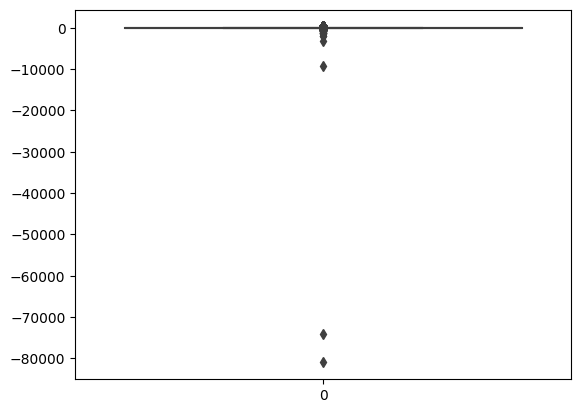

In [ ]:
sns.boxplot(df["Quantity"]);

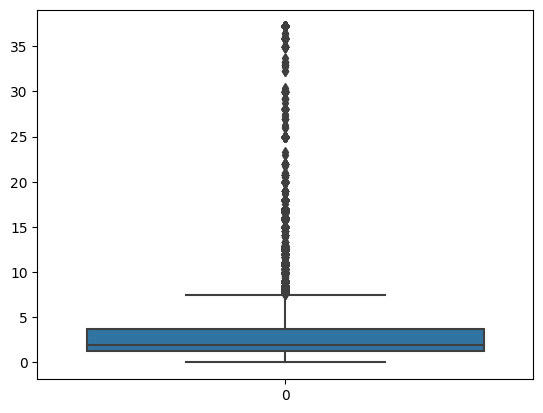

In [ ]:
sns.boxplot(df["UnitPrice"]);

#criando uma colula adcional de Quantity e UnitPrice

In [ ]:
df['PrecoTotal'] = df['UnitPrice']*df['Quantity']
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  PrecoTotal  
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39    17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75    17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39    17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39    17850.0  United Kingdom       20.34

#Fazendo os 10 maior vendas por paises

In [ ]:
venda_por_pais = df.groupby('Country')['PrecoTotal'].sum()

In [ ]:
top_10_vendas_pais = venda_por_pais.sort_values(ascending=False).head(10)

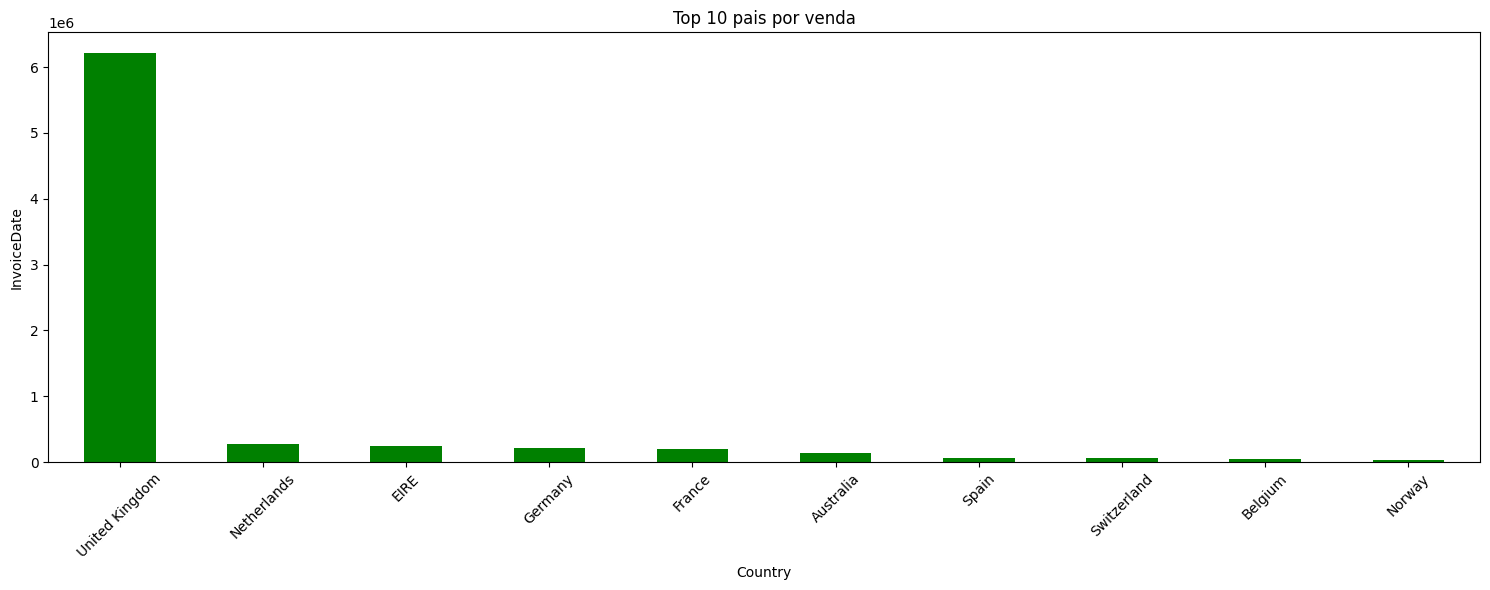

In [ ]:
plt.figure(figsize=(15, 6))
top_10_vendas_pais.plot(kind="bar", color="green")
plt.title("Top 10 pais por venda")
plt.xlabel("Country")
plt.ylabel("InvoiceDate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Lendo os dados para conferencia das colunas

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  PrecoTotal  Mês  
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom       15.30   12  
1 2010-12-01 08:26:00       3.39    17850.0  United Kingdom       20.34   12  
2 2010-12-01 08:26:00       2.75    17850.0  United Kingdom       22.00   12  
3 2010-12-01 08:26:00       3.39    17850.0  United Kingdom       20.34   12  
4 2010-12-01 08:26:00       3.39    17850.0  United Kingdom       20.34   12

#calculando RFM


In [ ]:
data_referencia = df['InvoiceDate'].max() + dt.timedelta(days=1)

In [ ]:
recencia_df = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recencia_df.columns = ['CustomerID', 'DataUltimaCompra']
recencia_df['Recencia'] = (data_referencia - recencia_df['DataUltimaCompra']).dt.days

In [ ]:
frequencia_df = df.groupby('CustomerID')['InvoiceDate'].count().reset_index()
frequencia_df.columns = ['CustomerID', 'Frequencia']

In [ ]:
monetario_df = df.groupby('CustomerID')['UnitPrice'].sum().reset_index()
monetario_df.columns = ['CustomerID', 'PrecoTotal']

In [ ]:
rfm_df = pd.merge(recencia_df, frequencia_df, on='CustomerID')
rfm_df = pd.merge(rfm_df, monetario_df, on='CustomerID')

In [ ]:
rfm_df['RecencyRank'] = pd.qcut(rfm_df['Recencia'], q=3, labels=["Baixa", "Média", "Alta"])
rfm_df['FrequenciaRank'] = pd.qcut(rfm_df['Frequencia'], q=3, labels=["Baixa", "Média", "Alta"])
rfm_df['ValorTotalRank'] = pd.qcut(rfm_df['PrecoTotal'], q=3, labels=["Baixa", "Média", "Alta"])

In [ ]:
rfm_df.tail(10)

CustomerID    DataUltimaCompra  Recencia  Frequencia  PrecoTotal  \
4362     18273.0 2011-12-07 13:16:00         2           3        7.65   
4363     18274.0 2011-11-22 10:18:00        18          22       80.78   
4364     18276.0 2011-11-18 17:01:00        21          16       47.25   
4365     18277.0 2011-10-12 15:22:00        58           9       37.88   
4366     18278.0 2011-09-27 11:58:00        74           9       29.55   
4367     18280.0 2011-03-07 09:52:00       278          10       47.65   
4368     18281.0 2011-06-12 10:53:00       181           7       39.36   
4369     18282.0 2011-12-02 11:43:00         8          13       62.68   
4370     18283.0 2011-12-06 12:02:00         4         721     1174.33   
4371     18287.0 2011-10-28 09:29:00        43          70      104.55   

     RecencyRank FrequenciaRank ValorTotalRank  
4362       Baixa          Baixa          Baixa  
4363       Baixa          Baixa          Média  
4364       Baixa          Baixa          Baixa  
4365       Média          Baixa          Baixa  
4366       Média          Baixa          Baixa  
4367        Alta          Baixa          Baixa  
4368        Alta          Baixa          Baixa  
4369       Baixa          Baixa          Baixa  
4370       Baixa           Alta           Alta  
4371       Média          Média          Média

In [ ]:
rfm_df.head(10)

CustomerID    DataUltimaCompra  Recencia  Frequencia  PrecoTotal  \
0     12346.0 2011-01-18 10:17:00       326           2       2.080   
1     12347.0 2011-12-07 15:52:00         2         182     481.210   
2     12348.0 2011-09-25 13:13:00        75          31     167.450   
3     12349.0 2011-11-21 09:51:00        19          73     339.520   
4     12350.0 2011-02-02 16:01:00       310          17      62.485   
5     12352.0 2011-11-03 14:37:00        36          95     739.535   
6     12353.0 2011-05-19 17:47:00       204           4      24.300   
7     12354.0 2011-04-21 13:11:00       232          58     261.220   
8     12355.0 2011-05-09 13:49:00       214          13      54.650   
9     12356.0 2011-11-17 08:40:00        23          59     188.870   

  RecencyRank FrequenciaRank ValorTotalRank  
0        Alta          Baixa          Baixa  
1       Baixa           Alta           Alta  
2       Média          Média          Média  
3       Baixa          Média           Alta  
4        Alta          Baixa          Baixa  
5       Média           Alta           Alta  
6        Alta          Baixa          Baixa  
7        Alta          Média           Alta  
8        Alta          Baixa          Baixa  
9       Baixa          Média          Média